In [1]:
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import (silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score,
                             calinski_harabasz_score, fowlkes_mallows_score, adjusted_mutual_info_score)
import numpy as np
import time

## Visualising the Two moons dataset

### Data Scaling

In [2]:
# Load two moons Dataset
X,y = make_moons(n_samples=500, noise=0.1, random_state=42)

### Plotting Data

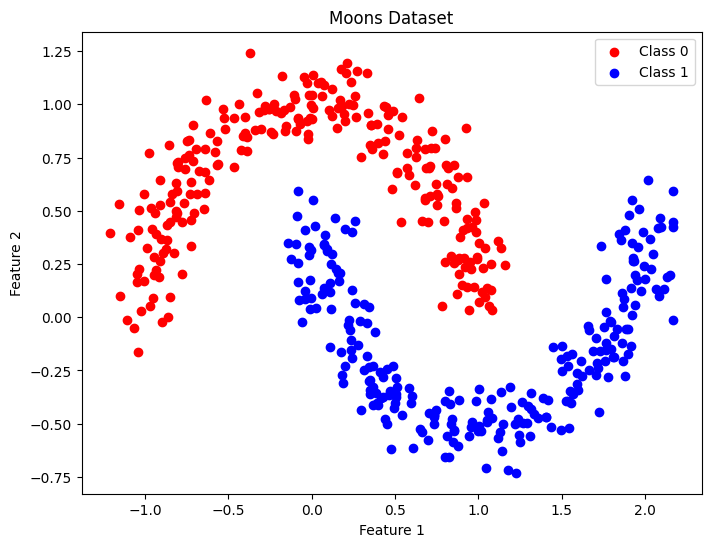

In [3]:
# Visualization of True Labels for two moons Dataset
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Clustering with DBSCAN

### Applying dbscan on two moons dataset

In [8]:
def metric_calculation(features, predicted_labels, true_labels):
    metrics = {}

    try:
        metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, predicted_labels)
        metrics['V Measure Score'] = v_measure_score(true_labels, predicted_labels)
        metrics['Fowlkes-Mallows Index'] = fowlkes_mallows_score(true_labels, predicted_labels)
        metrics['Adjusted Mutual Info Score'] = adjusted_mutual_info_score(true_labels, predicted_labels)
        metrics['Silhouette Score'] = silhouette_score(features, predicted_labels)
        metrics['David Bouldin Score'] = davies_bouldin_score(features, predicted_labels)
        metrics['Calinski Harabasz Score'] = calinski_harabasz_score(features, predicted_labels)
    except Exception as e:
        print('\t', e)

    return metrics



In [9]:
def plotting_results(x, y, title, axes=None):

    x0 = [i[0] for i in x]
    x1 = [i[1] for i in x]

    df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1,
                                'label' : y})
    df["label"] = df["label"].astype(str)

    p = sns.scatterplot(ax = axes, data=df, x='x1', y = 'x2', hue='label', legend=None)
    if axes is not None:
        axes.set_title(title)
        if len(set(y)) > 5:
            plt.legend([],[], frameon=False)
    else:
        sns.scatterplot(data=df, x='x1', y = 'x2', hue='label', legend=None)
        plt.show()

    return

##### Changing Epsilon value

	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
      Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Silhouette Score  David Bouldin Score  Calinski Harabasz Score  Number of clusters
eps                                                                                                                                                                              
0.05             0.000673         0.025569               0.696801                    0.022769         -0.132229             1.522685                 2.744295                   2
0.10             0.182758         0.408101               0.428378                    0.403989          0.343994             2.011192               191.626668                  11
0.15             0.984080         0.964943               0.991992                    0.964833          0.250819             3.403992               160.009965                   3
0.20             1.000000         1.0

<Figure size 640x480 with 0 Axes>

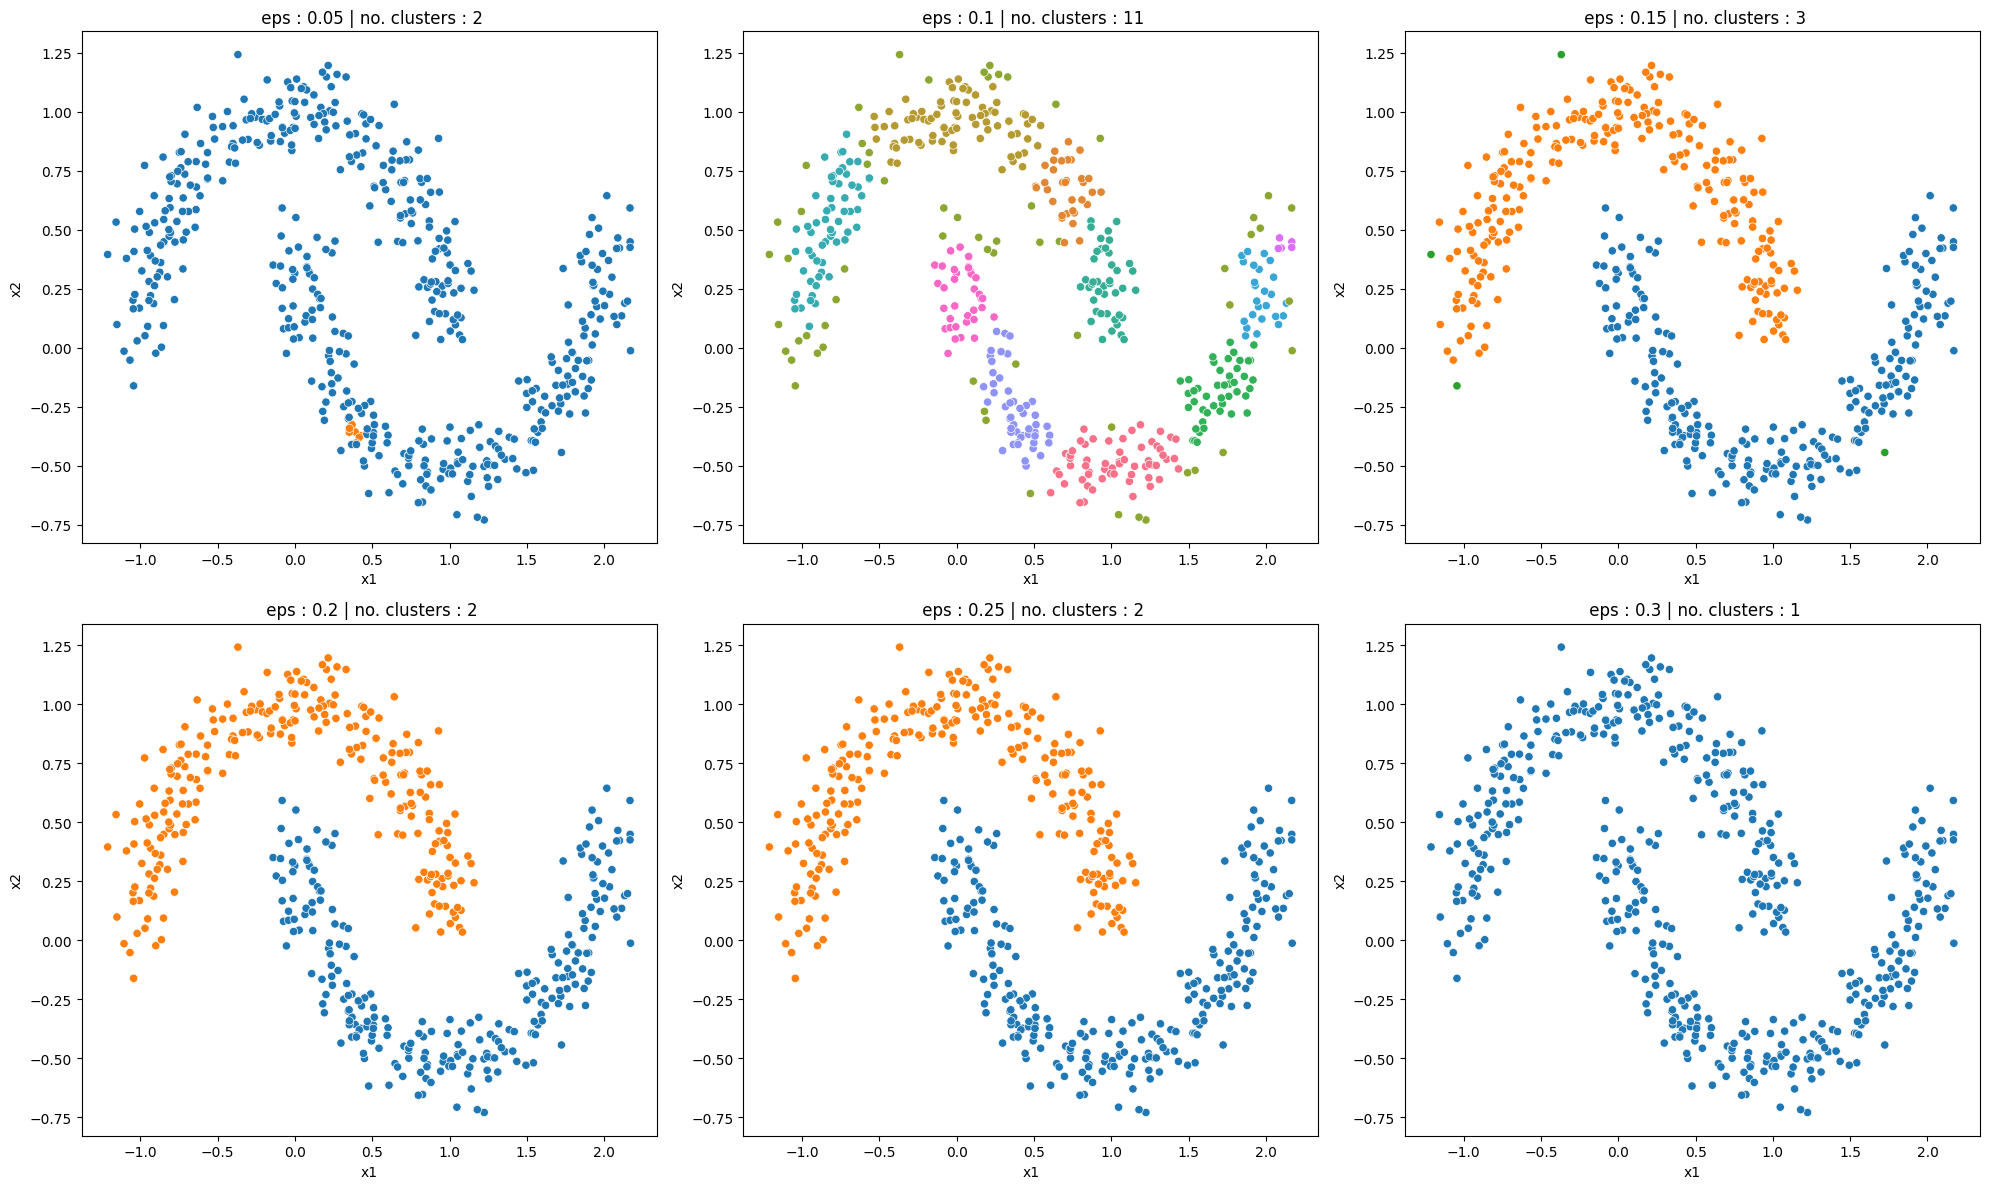

In [10]:
eps_space = [0.05, 0.1, 0.15, 0.2, 0.25,0.3]
results = []

plt.figure(1)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(len(eps_space)):
    eps = eps_space[i]

    clustering = DBSCAN(eps=eps, min_samples=7).fit(X)

    num = len(set(clustering.labels_))


    metrics = metric_calculation(X, clustering.labels_, y)
    metrics['eps'] = eps
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(X, clustering.labels_, f" eps : {eps} | no. clusters : {num}", axes[i//3, i%3])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.set_index('eps')
print(metrics_df)

plt.tight_layout()
plt.show()

##### Changing Minimum points value

      Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Silhouette Score  David Bouldin Score  Calinski Harabasz Score  Number of clusters
eps                                                                                                                                                                              
0.24                  1.0              1.0                    1.0                         1.0          0.327444             1.155831               327.847624                   2
0.24                  1.0              1.0                    1.0                         1.0          0.327444             1.155831               327.847624                   2
0.24                  1.0              1.0                    1.0                         1.0          0.327444             1.155831               327.847624                   2
0.24                  1.0              1.0                    1.0                         1.0          0.32744

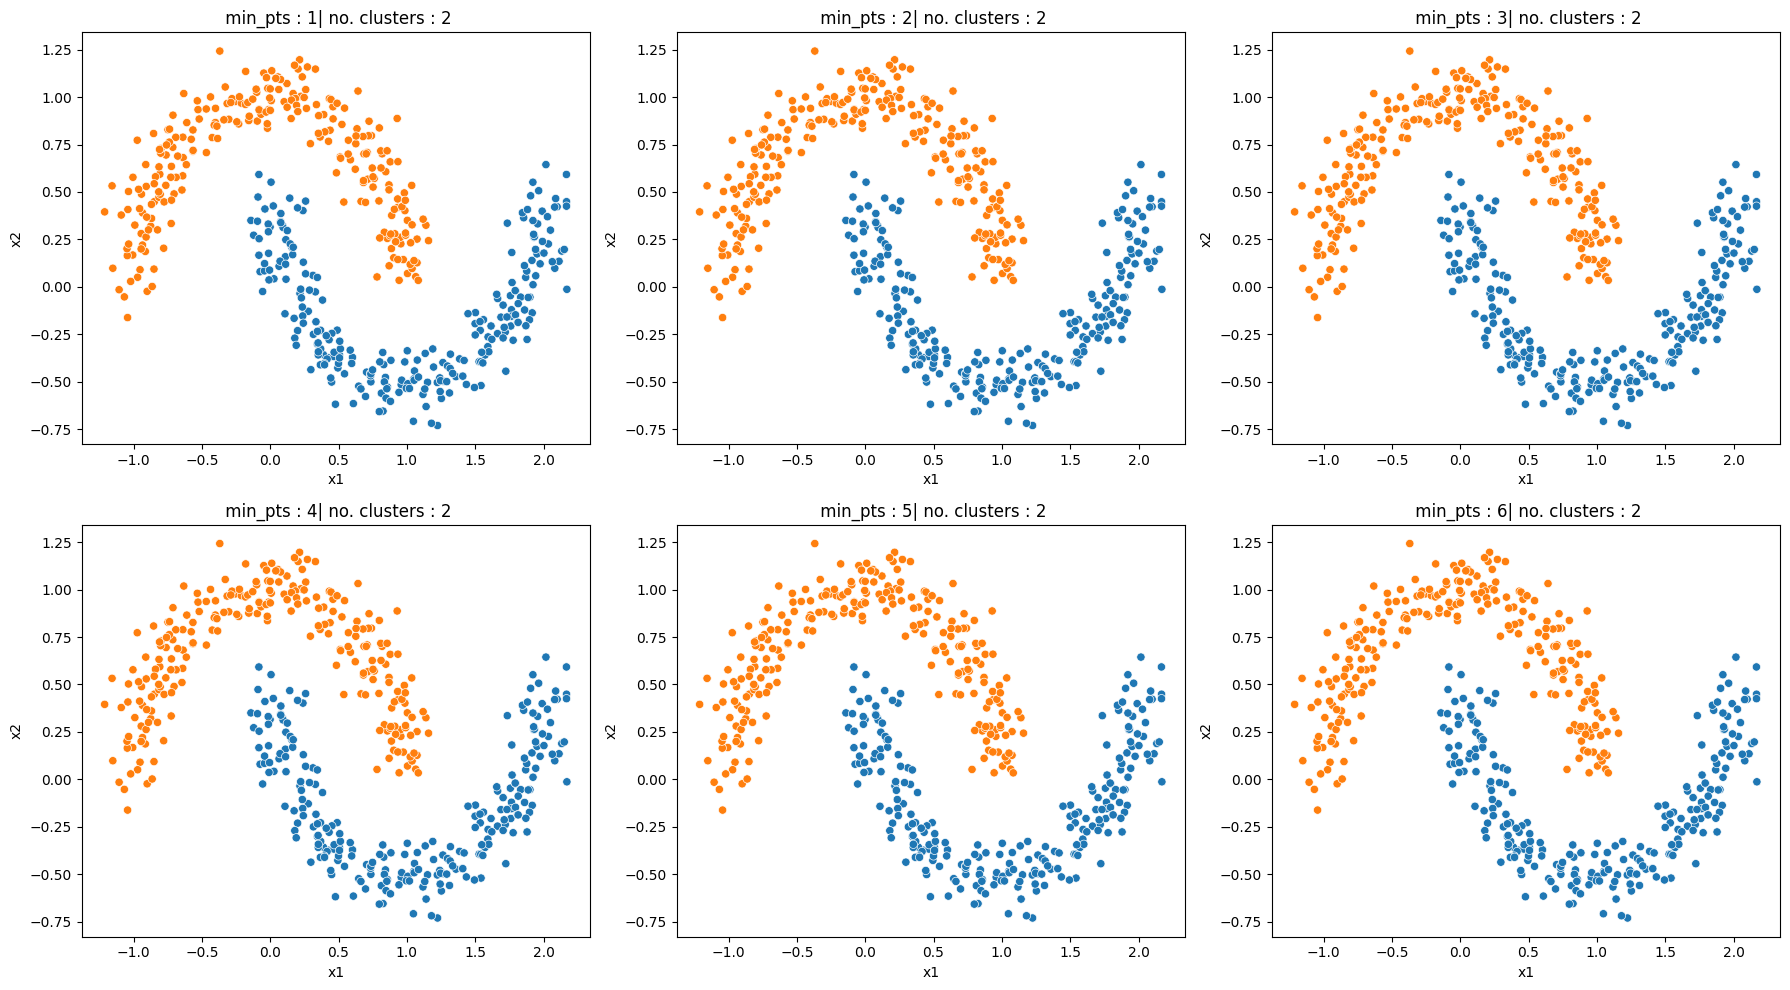

In [11]:
min_sample_space = [1,2,3,4,5,6]
results = []

eps = 0.24
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i in range(len(min_sample_space)):
    min_sample = min_sample_space[i]

    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(X)

    num = len(set(clustering.labels_))

    metrics = metric_calculation(X, clustering.labels_, y)
    metrics['eps'] = eps
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(X, clustering.labels_, f" min_pts : {min_sample}| no. clusters : {num}", axes[i//3, i%3])
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.set_index('eps')
print(metrics_df)

plt.tight_layout()
plt.show()

##### Changing Distance Metrics

	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
      Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Number of clusters  Silhouette Score  David Bouldin Score  Calinski Harabasz Score
eps                                                                                                                                                                              
0.24                  0.0              0.0               0.706398                         0.0                   1               NaN                  NaN                      NaN
0.24                  1.0              1.0               1.000000                         1.0                   2          0.327444             1.155831               327.847624
0.24                  1.0              1.0               1.000000                         1.0                   2          0.327444           

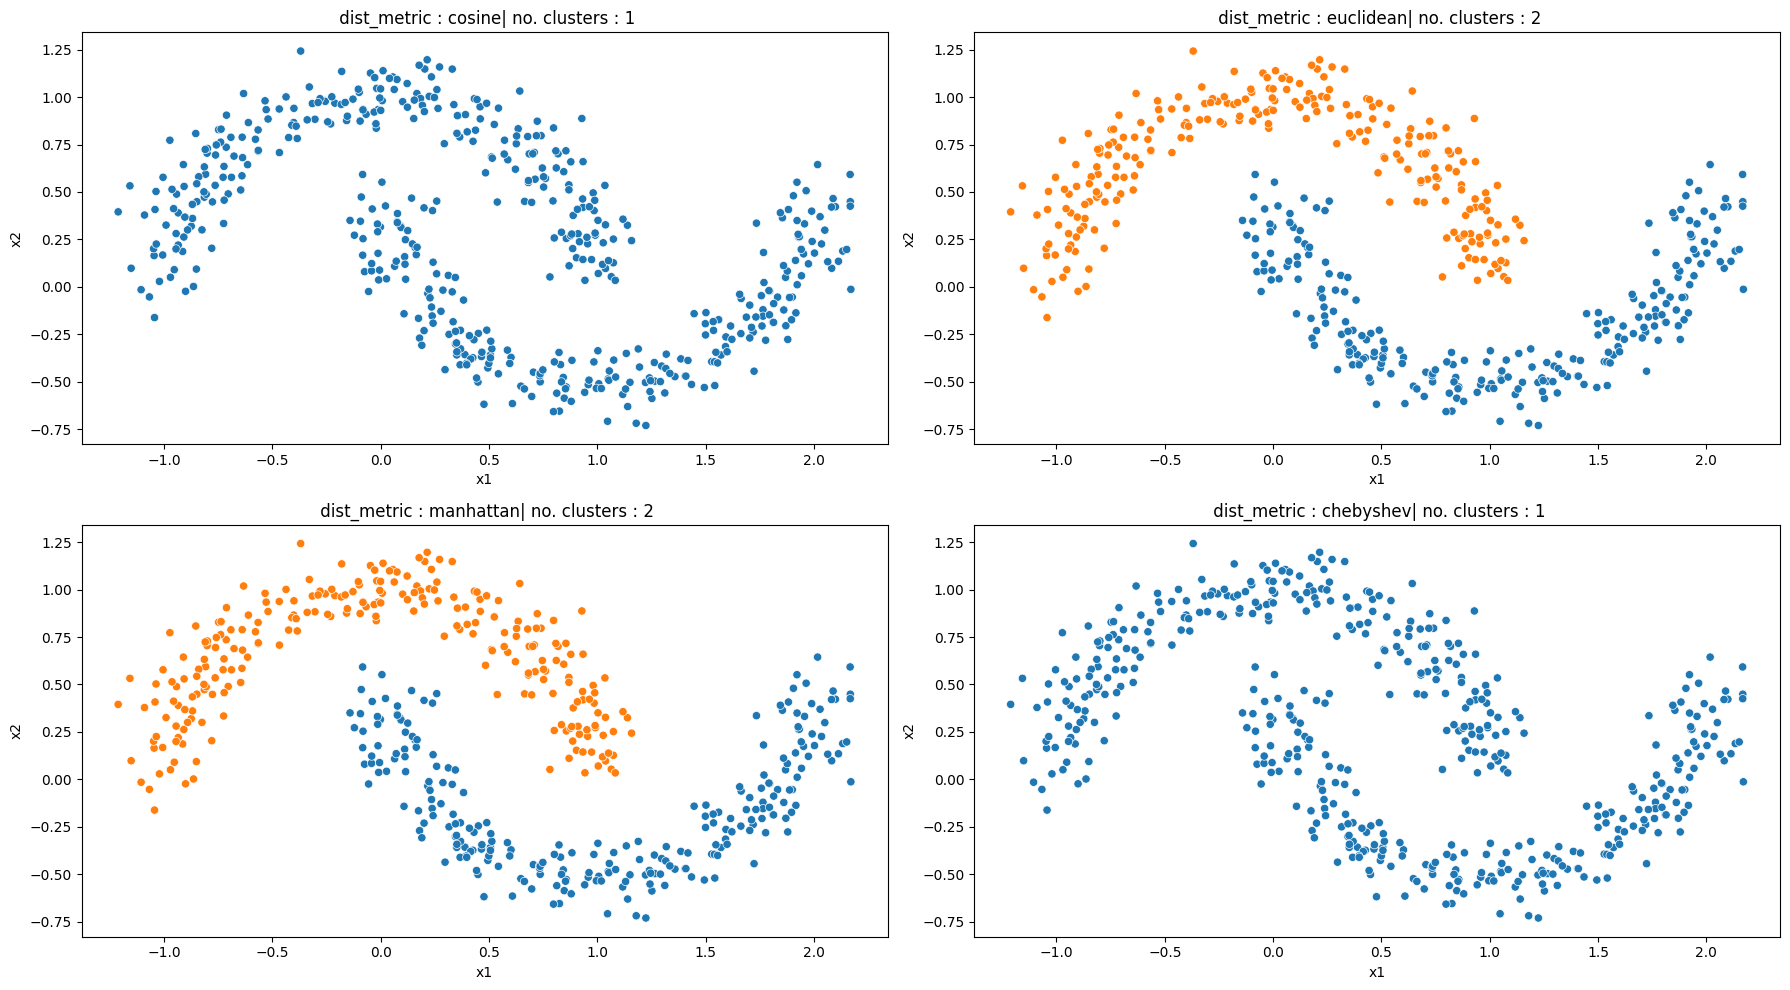

In [17]:

dist_metrics = ['cosine','euclidean', 'manhattan', 'chebyshev']
eps = 0.24
min_samples=2
results = []

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for i in range(len(dist_metrics)):
    dist_metric = dist_metrics[i]

    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=dist_metric).fit(X)
    metrics = metric_calculation(X, clustering.labels_, y)
    metrics['eps'] = eps
    num = len(set(clustering.labels_))
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(X, clustering.labels_, f" dist_metric : {dist_metric}| no. clusters : {num}", axes[i//2, i%2])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.set_index('eps')
print(metrics_df)

plt.tight_layout()
plt.show()

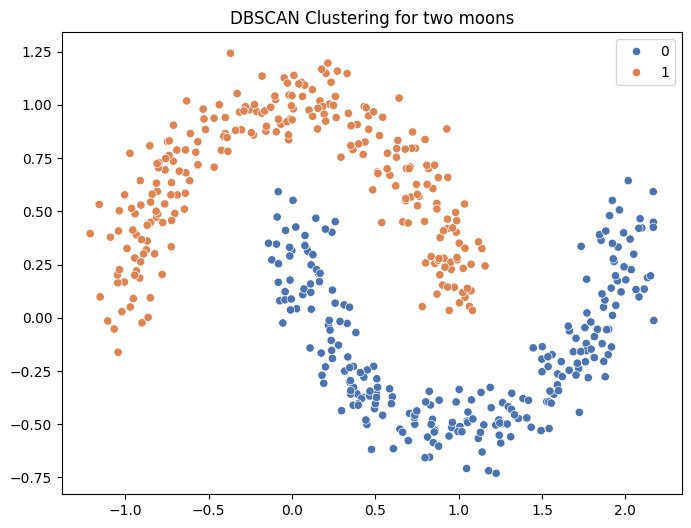

In [18]:
dbscan_wine = DBSCAN(eps=0.24, min_samples=2)
wine_dbscan_labels = dbscan_wine.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=wine_dbscan_labels, palette='deep', legend='full')
plt.title("DBSCAN Clustering for two moons")
plt.show()